In [2]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Let's say you invested $100 in a stock with a mean monthly return of 1%. But there is dispersion around the mean: the actual returns of the stock each month are 1% + 2% = 3% or 1% - 2% = -1%, with equal probability. By simulating many possible ways this scenario could play out over time, let's look at the distribution of ending values of the portfolio over several time horizons.

We'll model these returns using a _Bernoulli_ random variable, which we can simulate in code using `scipy.stats.bernoulli`. A Bernoulli random variable takes the values 1 or 0 with a probability set by a parameter `p`.

In [5]:
def generate_returns(num_returns):
    p = 0.5
    return 0.01 + (bernoulli.rvs(p, size=num_returns)-0.5)*0.04
print(generate_returns(6))

[-0.01  0.03 -0.01 -0.01 -0.01 -0.01]


First, let's look at the distribution of ending values of the stock over 6 months.

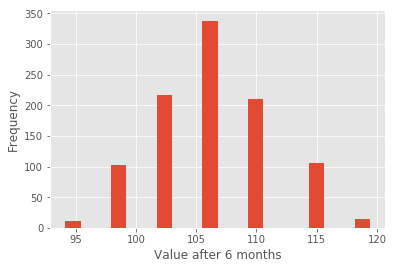

In [6]:
final_values = [100*np.prod(generate_returns(6)+1) for i in range(1,1000)]
plt.hist(final_values, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Value after 6 months')
plt.show()

After 6 months, the distribution of possible values looks symmetric and bell-shaped. This is because there are more paths that lead to middle-valued ending prices. Now, let's look at the ending values of the stock over 20 months.

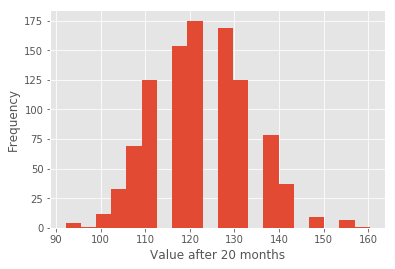

In [7]:
final_values = [100*np.prod(generate_returns(20)+1) for i in range(1,1000)]
plt.hist(final_values, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Value after 20 months')
plt.show()

Finally, let's look at the ending values of the stock over 100 months.

In [ ]:
final_values = [100*np.prod(generate_returns(100)+1) for i in range(1,1000)]
plt.hist(final_values, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Value after 100 months')
plt.show()

As you can see, the distribution gets less and less normal-looking over time. The upside potential is unlimited—there always exists the possibility that the stock will continue to appreciate over time. The downside potential, however, is limited to zero—you cannot loose more than 100% of your investment. The distribution we see emerging here is distinctly asymmetric—the values are always positive, but there is a long tail on the right-hand side: we say, it is _positively skewed_. The distribution is approaching what's called a _lognormal distribution_. Let's talk more about how this distribution emerges in the next video.